In [1]:
from pulp import *

In [2]:
prob = LpProblem('Giapetto', LpMaximize)  # optimizer, min or max
x1 = LpVariable('x1', lowBound = 0)
x2 = LpVariable('x2', lowBound = 0)
prob += 20*x1 + 30*x2
prob += 1*x1 + 2*x2 <= 100
prob += 2*x1 + 1*x2 <= 100
prob

Giapetto:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
x1 Continuous
x2 Continuous

In [3]:
status = prob.solve()
LpStatus[status]


'Optimal'

In [4]:
value(x1), value(x2), value(prob.objective)

(33.333333, 33.333333, 1666.6666500000001)

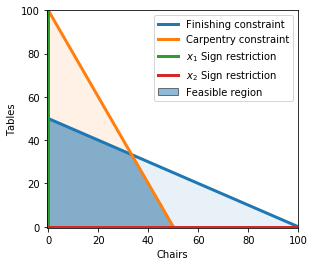

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Use seaborn to change the default graphics to something nicer
import seaborn as sns
# And set a nice color palette
sns.set_color_codes('deep')

# Create the plot object
fig, ax = plt.subplots(figsize=(4.5, 4))
x1 = np.linspace(0, 100)

# Add finishing constraint: x2 <= 100/2 - x1/2
plt.plot(x1, 100/2 - x1/2, linewidth=3, label='Finishing constraint')
plt.fill_between(x1, 0, 100/2 - x1/2, alpha=0.1)

# Add carpentry constraint: x2 <= 80 - x1
plt.plot(x1, 100 - 2*x1, linewidth=3, label='Carpentry constraint')
plt.fill_between(x1, 0, 100 - 2*x1, alpha=0.1)

# Add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, linewidth=3, label='$x_1$ Sign restriction')
plt.plot(x1, np.zeros_like(x1), linewidth=3, label='$x_2$ Sign restriction')

# Highlight the feasible region
path = Path([
    (0., 0.),
    (0., 50.),
    (100/3, 100/3),
    (50., 0.),
    (0., 0.)])
patch = PathPatch(path, label='Feasible region', alpha=0.5)
ax.add_patch(patch)

# Labels and stuff
plt.xlabel('Chairs')
plt.ylabel('Tables')
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend()
plt.show()

In [8]:
prob = LpProblem('Giapetto', LpMaximize)  # optimizer, min or max
x1 = LpVariable('x1', lowBound = 0, cat='Integer')
x2 = LpVariable('x2', lowBound = 0, cat='Integer')
prob += 20*x1 + 30*x2
prob += 1*x1 + 2*x2 <= 100
prob += 2*x1 + 1*x2 <= 100
prob

Giapetto:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
0 <= x1 Integer
0 <= x2 Integer

In [9]:
status = prob.solve()
LpStatus[status]

'Optimal'

In [10]:
value(x1), value(x2), value(prob.objective)

(32.0, 34.0, 1660.0)

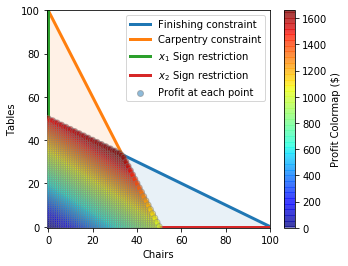

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Use seaborn to change the default graphics to something nicer
import seaborn as sns
# And set a nice color palette
sns.set_color_codes('deep')

# Create the plot object
fig, ax = plt.subplots(figsize=(5, 4))
x1 = np.linspace(0, 100)

# Add finishing constraint: x2 <= 100/2 - x1/2
plt.plot(x1, 100/2 - x1/2, linewidth=3, label='Finishing constraint')
plt.fill_between(x1, 0, 100/2 - x1/2, alpha=0.1)

# Add carpentry constraint: x2 <= 80 - x1
plt.plot(x1, 100 - 2*x1, linewidth=3, label='Carpentry constraint')
plt.fill_between(x1, 0, 100 - 2*x1, alpha=0.1)

# Add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, linewidth=3, label='$x_1$ Sign restriction')
plt.plot(x1, np.zeros_like(x1), linewidth=3, label='$x_2$ Sign restriction')

#====================================================
# This part is different from giapetto_feasible.py
# Plot the possible (x1, x2) pairs
pairs = [(x1, x2) for x1 in np.arange(101)
                for x2 in np.arange(101)
                if (x1 + 2*x2) <= 100
                and (2*x1 + x2) <= 100]

# Split these into our variables
chairs, tables = np.hsplit(np.array(pairs), 2)

# Caculate the objective function at each pair
z = 20*chairs + 30*tables

# Plot the results
plt.scatter(chairs, tables, c=z, cmap='jet', edgecolor='gray', alpha=0.5, label='Profit at each point', zorder=3)

# Colorbar
cb = plt.colorbar()
cb.set_label('Profit Colormap ($)')
#====================================================

# Labels and stuff
plt.xlabel('Chairs')
plt.ylabel('Tables')
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend()
plt.show()